In [96]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [97]:
with open('에너지드링크.json') as json_file:
    json_data = json.load(json_file)

In [98]:
df = pd.DataFrame(json_data['data'])

In [99]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[몬스터 에너지 평소에도 자주 마시는데 이번에 울트라 파라다이스가 국내에서 5번째로...,"[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 7월 23일,"[35,877]"
1,1,[촬영할때마다 찾게되는 몬스터 에너지 !\n...,"[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 7월 24일,"[14,414]"
2,2,[#유료광고\n요즘 너무 바쁜 하루를 보내지만\n몬스터 에너지로 충전하고 다시 파이...,"[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 9월 16일,"[10,475]"
3,3,[#유료광고 몬스터 에너지에서 도착한 선물...,"[유료광고, 몬스터에너지, MonsterEnergy, 울ᄐ...",[],2020년 9월 10일,"[11,391]"
4,4,"[.\n새로 나온 몬스터 에너지 울트라 파라다이스 존맛탱,,,,\n키위랑 라임 맛에...","[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 7월 24일,"[2,407]"
...,...,...,...,...,...,...
9995,9995,[털쪼끼 개시\n할인받아서 착한가격에 득템\n외출전👶🏻♥️\n#에너지바 #에너지드링...,"[에너지바, 에너지드링크, 에너지충전, 9개월아기, 9개월, 9개월아가, 아들, 아...",[],2018년 10월 9일,[27]
9996,9996,[⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n돈 벌면서 힐링하기\n미팅 기다리면서❤️\n⠀⠀⠀...,"[아실리, asili, 아실리코리아, 네트워크마케팅, 네트워커, 네트워크사업, 암웨...",[],2018년 10월 9일,[45]
9997,9997,[2018년 10월 9일 화요일\n\n오전 미팅 후 밥먹고\n커피 에너지 보충~\n...,"[아침미팅, 아침밥, 커피, 에너지드링크, 에너자이저, 이지성작가, R, 저축상담,...",[],2018년 10월 9일,[27]
9998,9998,[열심히 사는 만큼\n보상해주는 아실리❤️\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n“만약...,"[아실리, asili, 아실리코리아, 네트워크마케팅, 네트워커, 네트워크사업, 암웨...",[],2018년 10월 8일,[87]


# Hashtags 분석

# 1. Word Cloud

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [101]:
tags = [element for array in list(df.Hashtags) for element in array]

In [102]:
tags[0:5]

['유료광고', '몬스터에너지', 'MonsterEnergy', '울트라파라다이스', '나만의파라다이스']

In [103]:
monster_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '비타500', '카페인대신비타500', '카페인대신비타500	'\
                     '건강한비타민c', 'redbull','건강한비타민c', '카페인대신비타500', '에너지드링크', '에너지음료']

In [104]:
cv = CountVectorizer(max_features=10000, stop_words = monster_stop_words)

In [105]:
tdm = cv.fit_transform(tags)

In [106]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [107]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
7584,일상,1509
3220,다이어트,1233
6605,에이트타임,785
3505,데일리,731
5582,소통,727
7011,운동,704
6120,아르기닌,698
7082,운동하는여자,661
8039,좋아요,648
4103,맞팔,621


In [108]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [109]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

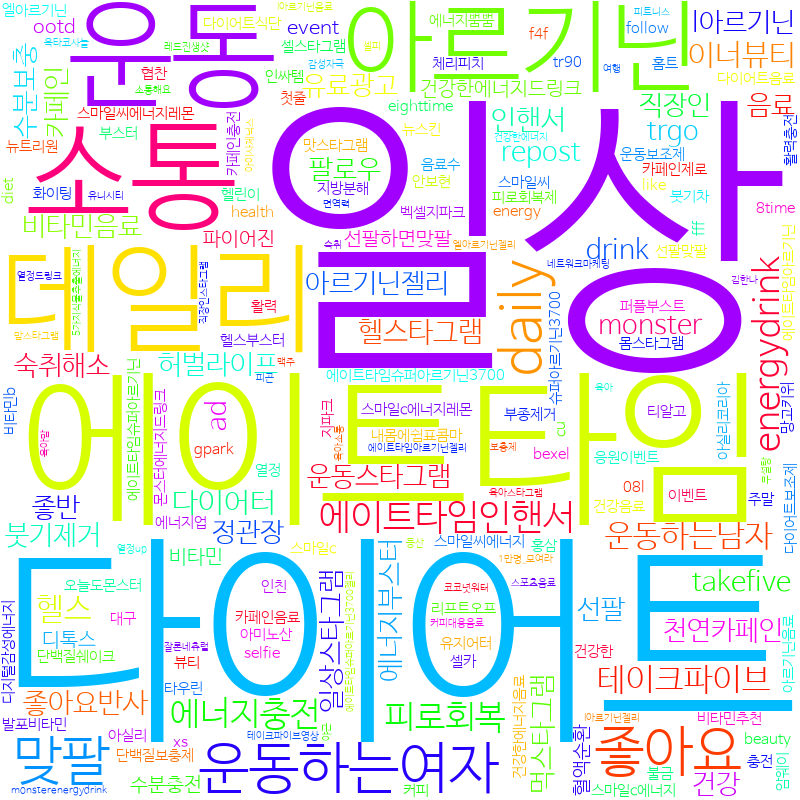

In [110]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [111]:
tdm.shape

(163079, 10000)

In [112]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [113]:
words = cv.get_feature_names()

In [114]:
tokens = tags

In [115]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 3min 31s


In [116]:
from sklearn.decomposition import TruncatedSVD

In [117]:
svd = TruncatedSVD(n_components=1000)

In [118]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [119]:
svd.components_.shape

(1000, 10000)

In [120]:
word_emb = svd.components_.T

In [121]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 7584
다이어트 3220
에이트타임 6605
데일리 3505
소통 5582
운동 7011
아르기닌 6120
운동하는여자 7082
좋아요 8039
맞팔 4103
daily 427
에이트타임인핸서 6617
energydrink 506
에너지충전 6564
피로회복 9252
테이크파이브 8815
헬스 9621
운동하는남자 7078
이너뷰티 7370
다이어터 3214
좋아요반사 8046
헬스타그램 9643
인핸서 7545
좋반 8029
아르기닌젤리 6130
운동스타그램 7041
선팔 5457
수분보충 5668
정관장 7899
ad 175
천연카페인 8357
카페인 8569
음료 7315
takefive 1320
붓기제거 5003
l아르기닌 912
비타민음료 5137
trgo 1363
유료광고 7232
에너지부스터 6537
먹스타그램 4174
drink 471
monster 969
repost 1208
직장인 8228
숙취해소 5730
허벌라이프 9559
일상스타그램 7596
팔로우 8974
건강 2267
건강한에너지드링크 2316
혈액순환 9672
디톡스 3677
선팔하면맞팔 5468
비타민 5118
ootd 1077
수분충전 5672
파이어진 8939
event 523
에이트타임슈퍼아르기닌3700 6612
유지어터 7255
스마일c에너지 5785
아실리 6175
8time 159
오늘도몬스터 6836
충전 8502
첫줄 8368
건강음료 2291
xs 1445
스마일c 5784
스마일씨 5787
스마일씨에너지 5788
스마일c에너지레몬 5786
운동보조제 7027
스마일씨에너지레몬 5789
이벤트 7389
퍼플부스트 9008
지파크 8214
다이어트보조제 3235
헬린이 9611
bexel 270
부종제거 4939
diet 448
energy 500
다이어트음료 3260
내몸에쉼표콤마 2988
selfie 1239
단백질보충제 3307
응원이벤트 7350
뉴스킨 3123
에너지업 6550
열정 6750
카페인음료 8578
카페인제로 8583
다이어트식단 325

In [122]:
word_emb = svd.components_.T

In [123]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [124]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 2min 36s


99

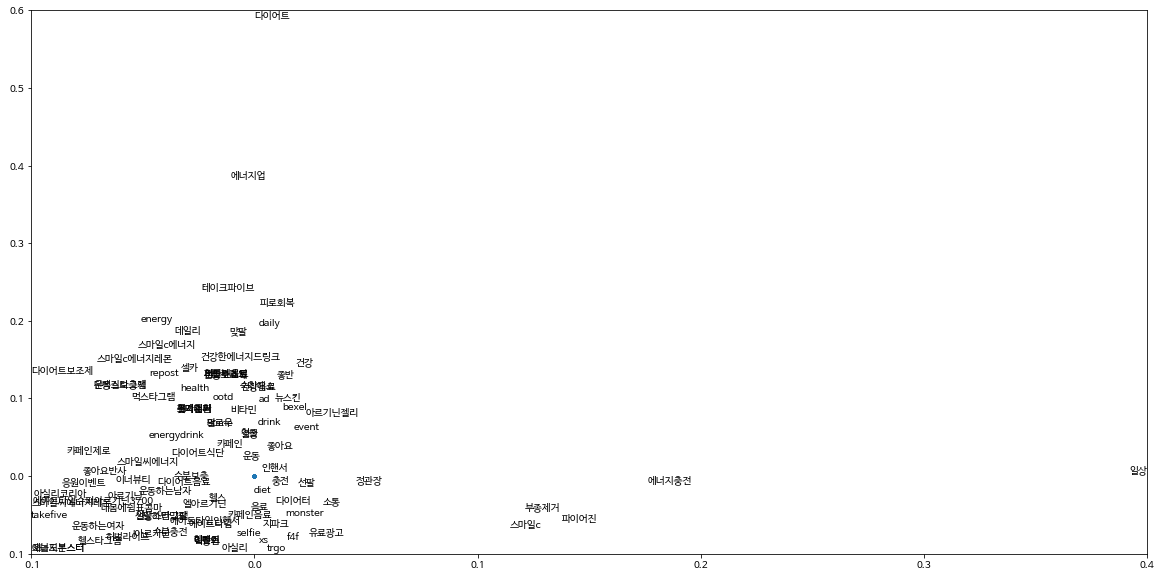

In [125]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.4)
pyplot.ylim(-0.1, 0.6)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [126]:
from sklearn.manifold import TSNE

In [127]:
tsne = TSNE()

In [128]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 17min 50s


500

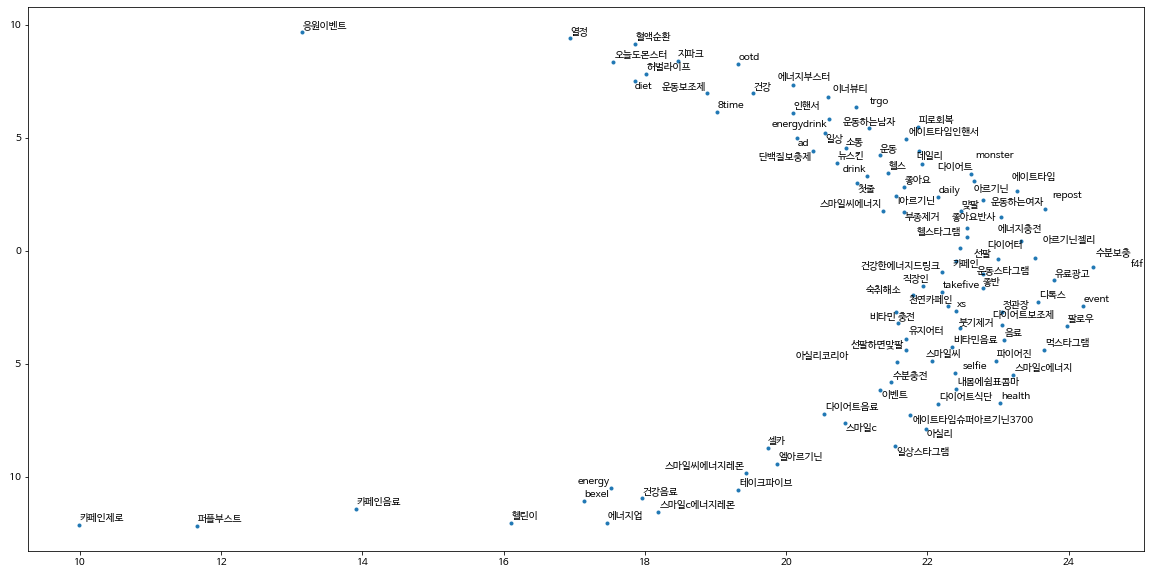

In [129]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [130]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [64]:
sentences = list(df['Hashtags'])

In [131]:
model = Word2Vec(sentences, size = 1000, min_count = 150, workers = 4, window = 100) # negative, sg

RuntimeError: you must first build vocabulary before training the model

In [ ]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [ ]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [70]:
locates = [element for array in list(df.Locates) for element in array]

In [71]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [72]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
461,seoul,207
128,daegu,57
72,busan,40
207,gwangju,32
1199,어딘가,23


In [73]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [74]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

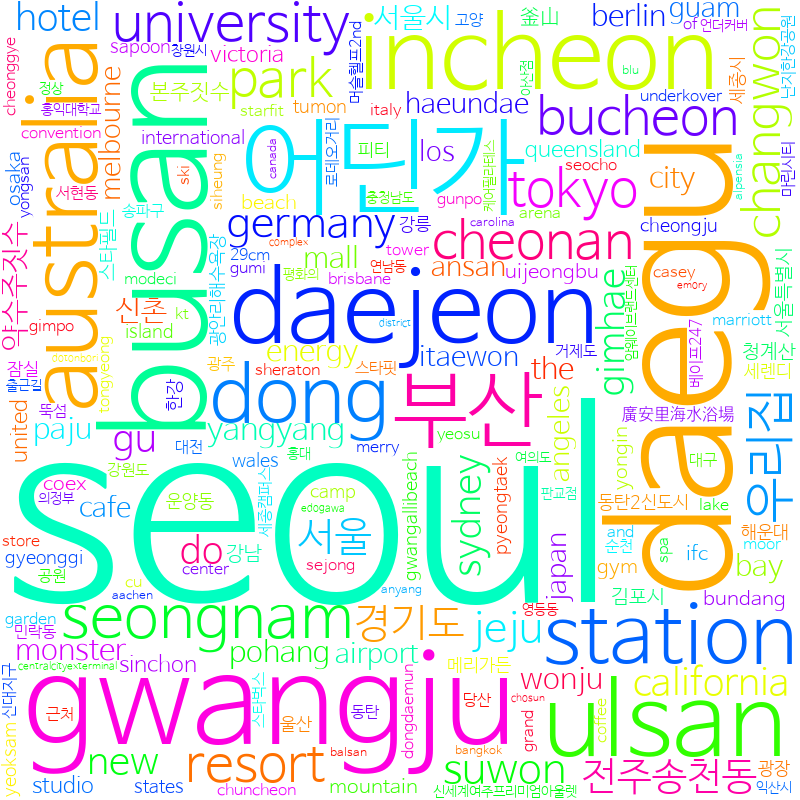

In [75]:
cloud.to_image()

## - Embedding

- LSA

In [76]:
tdm.shape

(1757, 1604)

In [77]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [78]:
words = cv.get_feature_names()
tokens = locates

In [79]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 94.7 ms


In [80]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 2.07 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [81]:
svd.components_.shape

(1000, 1604)

In [82]:
word_emb = svd.components_.T

In [83]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 461
daegu 128
busan 72
gwangju 207
어딘가 1199
incheon 261
daejeon 129
ulsan 549
australia 42
부산 963
station 502
university 555
dong 143
seongnam 460
우리집 1276
park 396
resort 433
cheonan 97
tokyo 538
bucheon 69
changwon 94
jeju 278
germany 182
서울 1029
경기도 664
suwon 518
전주송천동 1371
gu 199
gimhae 186
new 374
sydney 521
hotel 243
do 141
california 77
yangyang 589
bay 53
energy 158
city 108
paju 392
pohang 416
the 534
berlin 57
약수주짓수 1186
mall 333
서울시 1033
monster 356
신촌 1135
wonju 581
melbourne 344
cafe 74
studio 508
sinchon 472
itaewon 268
japan 275
haeundae 217
guam 200
釜山 632
ansan 25
airport 13
united 553
본주짓수 958
angeles 23
queensland 426
victoria 559
los 322
beach 54
스타필드 1111
ifc 256
gym 214
청계산 1424
coex 113
uijeongbu 548
bundang 71
yongin 599
mountain 359
서울특별시 1036
김포시 746
강남 642
osaka 388
sapoon 449
울산 1284
운양동 1283
피티 1535
광안리해수욕장 701
cheongju 101
광장 702
세종시 1066
states 501
international 266
잠실 1351
island 267
동탄2신도시 836
gyeonggi 210
yeoksam 593
gwangallibeach 205
廣安里海水浴場 62

In [84]:
word_emb = svd.components_.T

In [85]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 3min 25s


440

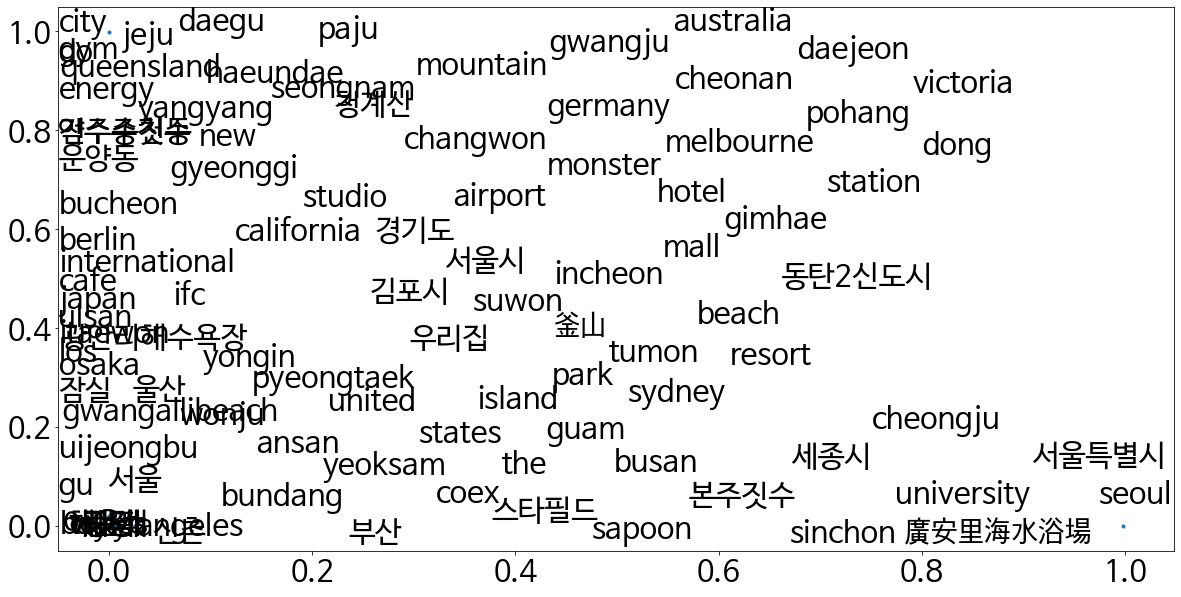

In [86]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [87]:
tsne = TSNE()

In [88]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 27.1 s


151

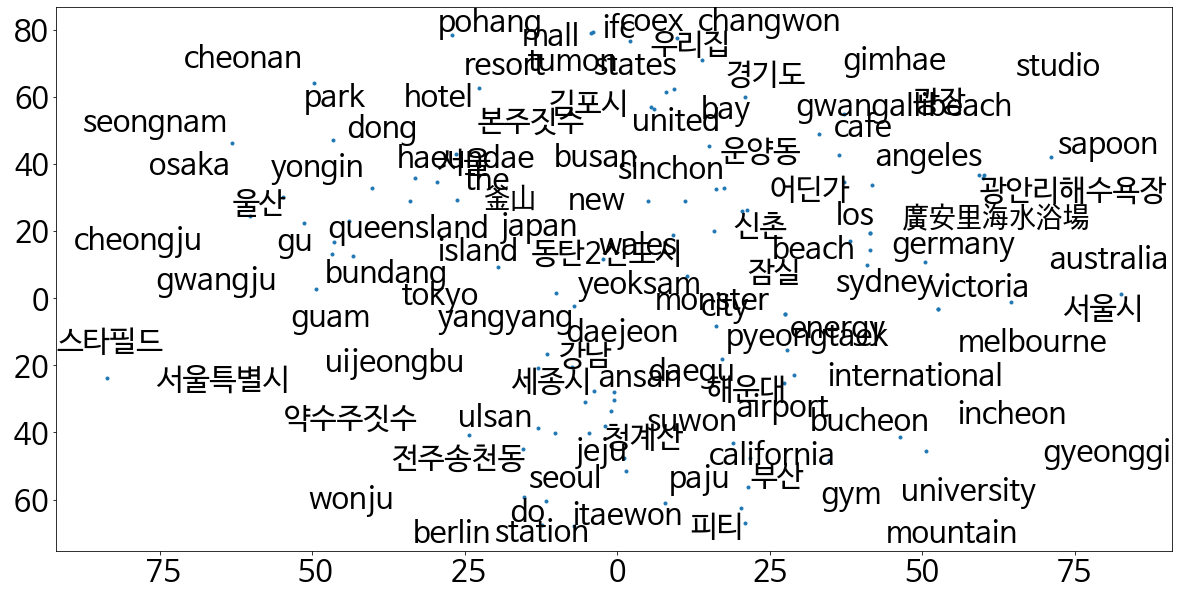

In [89]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [90]:
sentences = list(df['Locates'])

In [91]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [92]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [93]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 4.99 ms


In [94]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

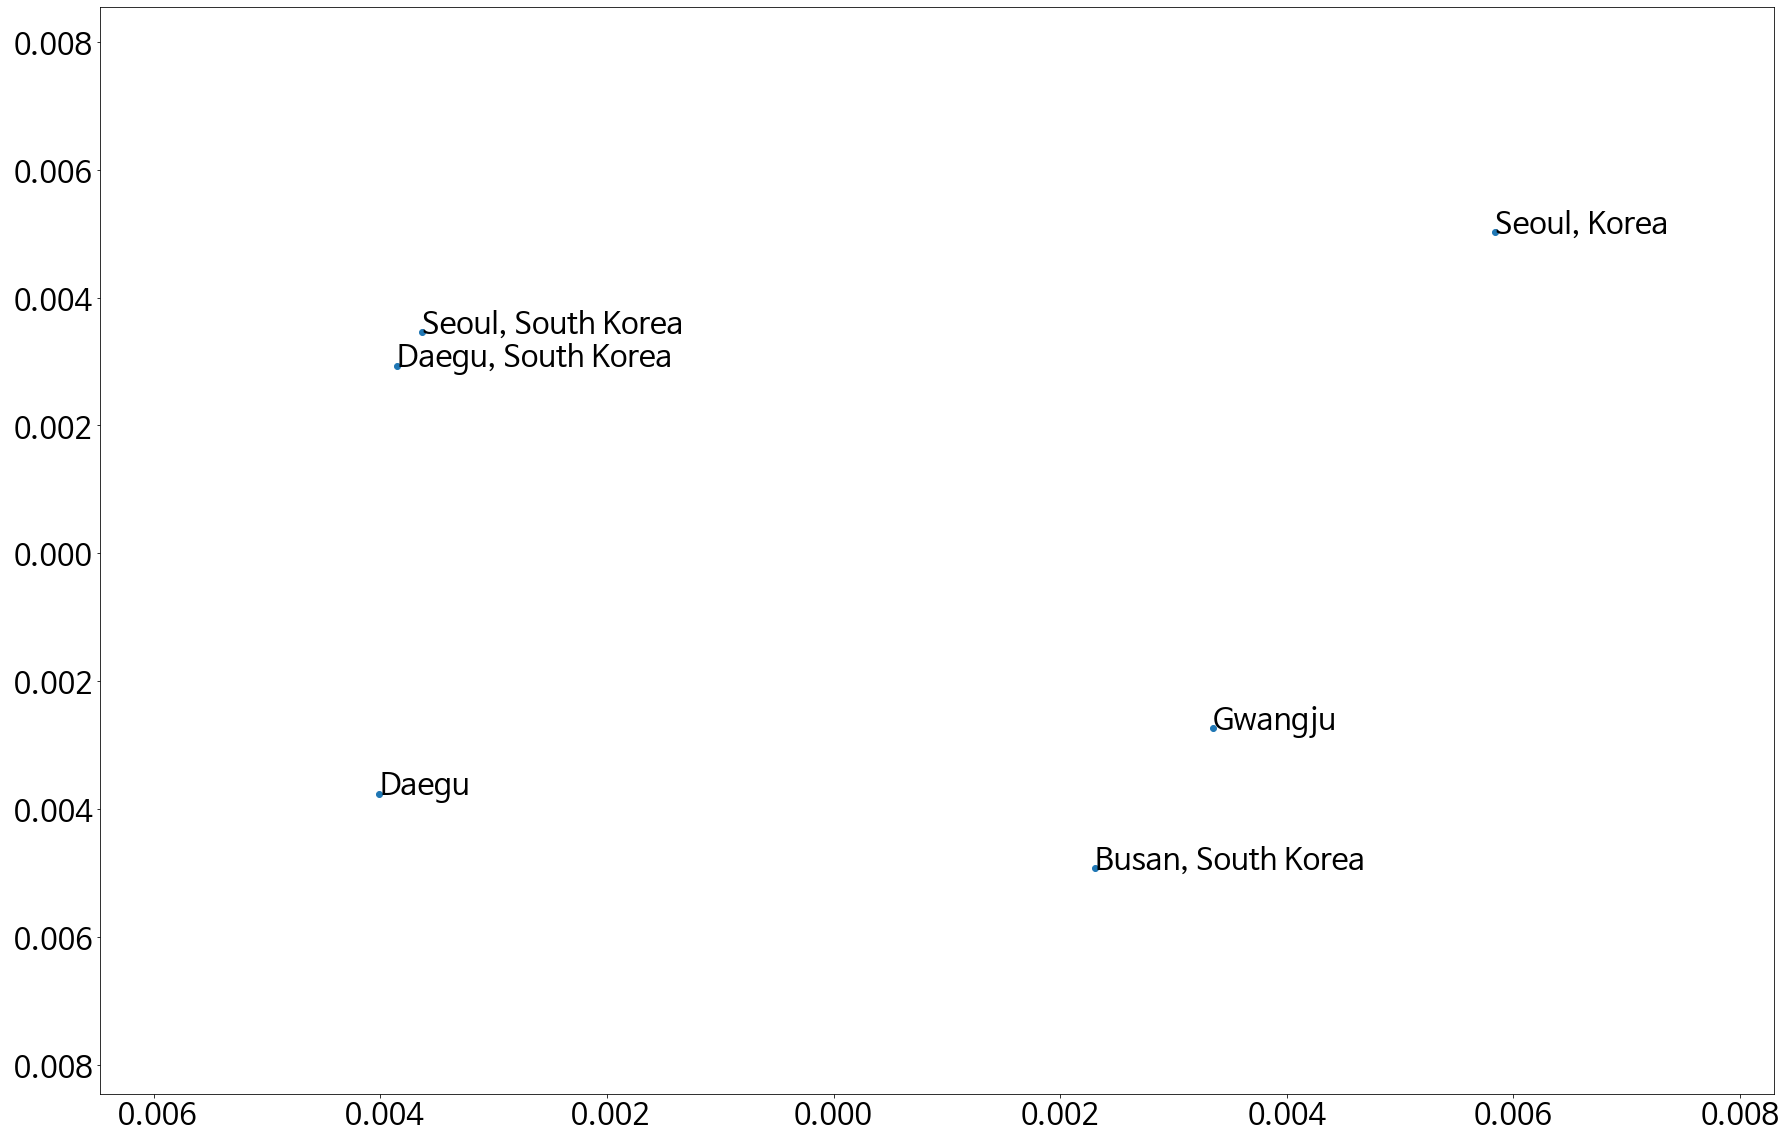

In [95]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))